In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Part A: Periodic Model and Example Plot of Sampled Data with Gaussian Error

In [3]:
def periodic_model(t,a):
    return a[0] + a[1]*t + a[2]*np.sin(a[4]*t) + a[3]*np.cos(a[4]*t)

In [4]:
# make x values
N = int(1E2)
START = 0
END = 100
x0 = np.linspace(START,END,N)
print(x0)

[  0.           1.01010101   2.02020202   3.03030303   4.04040404
   5.05050505   6.06060606   7.07070707   8.08080808   9.09090909
  10.1010101   11.11111111  12.12121212  13.13131313  14.14141414
  15.15151515  16.16161616  17.17171717  18.18181818  19.19191919
  20.2020202   21.21212121  22.22222222  23.23232323  24.24242424
  25.25252525  26.26262626  27.27272727  28.28282828  29.29292929
  30.3030303   31.31313131  32.32323232  33.33333333  34.34343434
  35.35353535  36.36363636  37.37373737  38.38383838  39.39393939
  40.4040404   41.41414141  42.42424242  43.43434343  44.44444444
  45.45454545  46.46464646  47.47474747  48.48484848  49.49494949
  50.50505051  51.51515152  52.52525253  53.53535354  54.54545455
  55.55555556  56.56565657  57.57575758  58.58585859  59.5959596
  60.60606061  61.61616162  62.62626263  63.63636364  64.64646465
  65.65656566  66.66666667  67.67676768  68.68686869  69.6969697
  70.70707071  71.71717172  72.72727273  73.73737374  74.74747475
  75.7575757

### Take a random sampling of the x values, get y values, and add gaussian error

In [5]:
rng = np.random.default_rng()
# create random sample from x0
x = rng.choice(a=x0,size=N//4,replace=False)
print(x)

[29.29292929 96.96969697  5.05050505 25.25252525 37.37373737 84.84848485
 91.91919192  0.         15.15151515 70.70707071 43.43434343 18.18181818
 89.8989899  24.24242424 50.50505051 40.4040404  55.55555556 47.47474747
 52.52525253 56.56565657  6.06060606 17.17171717 32.32323232 54.54545455
 48.48484848]


In [14]:
# get sample data
param = [1,1,1,1,1]
y = periodic_model(x,param)
print(y)

# add gaussian error
errors = np.random.normal(0,1,len(y))
# print(errors)
y = y+errors
print(y)

[ 2.          5.43883421  7.81519142 15.83055218 17.07060262 19.34783148
 25.09431869 27.3648575  28.91699493 34.72695025 39.00160483 40.92079182
 44.76699411 47.19196585 48.29848263 52.7137741  53.66140604 54.21843253
 56.26391131 58.58250024 72.68561083 84.82332908 91.47797224 91.50551723
 97.46393962]
[ 1.6102491   5.74896902  9.22167319 16.56751239 19.02007197 18.27868801
 26.48982583 25.13248117 28.30396372 33.09413346 39.00447869 39.8657783
 45.37386255 47.90592395 47.95107718 51.63002128 52.89842569 54.17720506
 55.99304161 57.62443047 73.78911297 85.28515119 92.81171432 91.69948955
 97.60226614]


### Plot the data

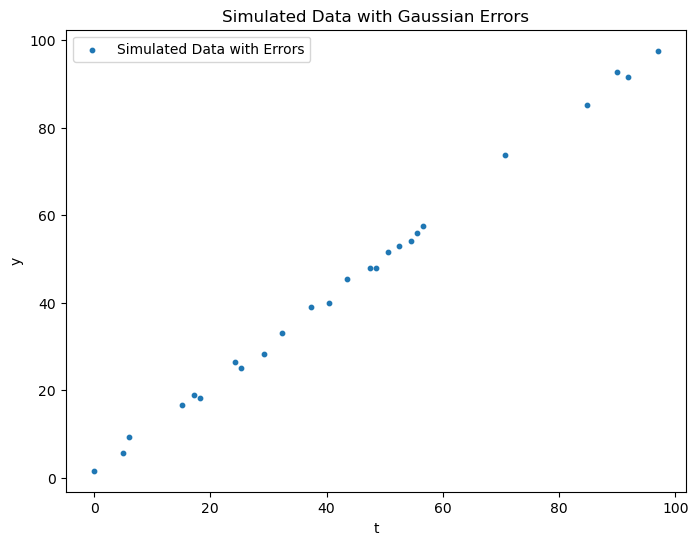

In [15]:
# Create a figure and axis (subplot)
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot on the specified axis
ax.scatter(x, y, label='Simulated Data with Errors', marker='o', s=10)

ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_title('Simulated Data with Gaussian Errors')
ax.legend()

# Show the plot
plt.show()

# Part B: Simulate 100 points from t=20 to t=35

In [44]:
def periodic_fit(t,*param):
    return param[0] + param[1]*t + param[2]*np.sin(param[4]*t) + param[3]*np.cos(param[4]*t)

In [45]:
x0 = np.linspace(20,35,1000)
N = 100
rng = np.random.default_rng()
# create random sample from x0
x = rng.choice(a=x0,size=N,replace=False)
print(x)

[28.91891892 34.96996997 26.08108108 31.12612613 33.1981982  27.92792793
 27.80780781 31.95195195 28.52852853 23.91891892 30.91591592 32.85285285
 31.86186186 24.86486486 27.4024024  22.02702703 27.50750751 22.56756757
 20.33033033 28.67867868 21.90690691 24.65465465 33.04804805 30.31531532
 25.64564565 21.93693694 24.29429429 26.05105105 23.04804805 25.04504505
 26.87687688 20.3003003  29.2042042  31.3963964  26.92192192 23.58858859
 20.85585586 28.4984985  28.37837838 27.97297297 22.46246246 26.0960961
 32.50750751 25.25525526 22.07207207 23.09309309 33.003003   22.68768769
 30.66066066 26.59159159 27.16216216 30.67567568 32.32732733 22.19219219
 21.57657658 26.60660661 25.54054054 27.11711712 28.81381381 23.85885886
 21.98198198 34.77477477 32.58258258 32.65765766 29.87987988 20.55555556
 29.33933934 30.48048048 25.10510511 23.39339339 22.61261261 28.94894895
 33.45345345 34.54954955 21.2012012  21.30630631 31.66666667 32.82282282
 34.26426426 28.9039039  20.43543544 23.31831832 33.

In [46]:
# get data
param = [0,1,1,1,0]
y = periodic_model(x,param)

# add gaussian error
errors = np.random.normal(0,0.5,N)
# print(errors)
y = y+errors
ey = 0.5*np.sqrt(np.fabs(y))

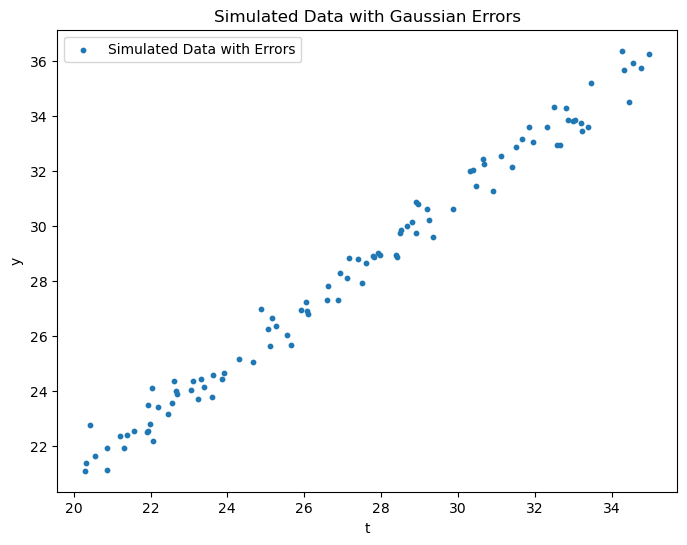

In [47]:
# Create a figure and axis (subplot)
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot on the specified axis
ax.scatter(x, y, label='Simulated Data with Errors', marker='o', s=10)

ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_title('Simulated Data with Gaussian Errors')
ax.legend()

# Show the plot
plt.show()

### Part C: Fit with same function

In [73]:
init_vals = [0.5,2,0,1,0] # going to cheat a bit with initial vals - curve_fit doesn't like me!
# print(init_vals)
#popt, pcov = curve_fit(periodic_fit,x,y,sigma=ey,p0=init_vals)
popt, pcov = curve_fit(periodic_fit,x,y,sigma=ey,p0=init_vals,absolute_sigma=True)

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

Coefficients (from curve_fit)
[7.76719181e-01 1.00859468e+00 7.81852570e-02 6.54253079e-02
 9.54103053e+05]
Covariance Matrix (from curve_fit)
[[ 2.81186717e+00 -1.03097734e-01 -1.71931885e-01  1.17888215e-01
  -7.90308646e-02]
 [-1.03097734e-01  3.87997937e-03  5.83397705e-03 -4.52221744e-03
   2.53738048e-03]
 [-1.71931885e-01  5.83397705e-03  3.89047053e+00 -3.05664036e+00
   1.82454142e+00]
 [ 1.17888215e-01 -4.52221744e-03 -3.05664036e+00  2.60916392e+00
  -1.47703084e+00]
 [-7.90308646e-02  2.53738048e-03  1.82454142e+00 -1.47703084e+00
   8.87009591e-01]]


Chi^2 / dof = 3.529E+00 / 95
Fit Parameter 0: 7.767E-01 +/- 1.677E+00
0 1 -9.870E-01
0 2 -5.198E-02
0 3 4.352E-02
0 4 -5.004E-02
Fit Parameter 1: 1.009E+00 +/- 6.229E-02
1 2 4.748E-02
1 3 -4.495E-02
1 4 4.325E-02
Fit Parameter 2: 7.819E-02 +/- 1.972E+00
2 3 -9.594E-01
2 4 9.822E-01
Fit Parameter 3: 6.543E-02 +/- 1.615E+00
3 4 -9.709E-01
Fit Parameter 4: 9.541E+05 +/- 9.418E-01


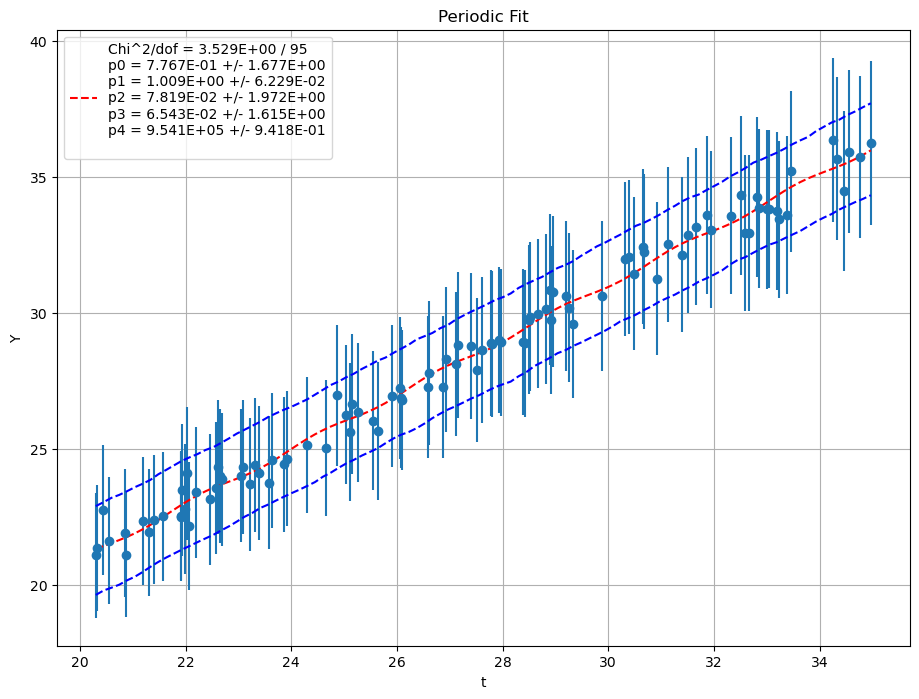

In [52]:
fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.set_title("Periodic Fit")
ax1.set_xlabel('t')
ax1.set_ylabel('Y')
ax1.set_yscale("linear")
ax1.grid(True)

ax1.errorbar(x,y,yerr=ey,fmt='o')

xi = np.linspace(np.min(x),np.max(x),100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([periodic_fit(xi,*pi) for pi in ps])
lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)

yfit = []
chi2=0
for i in range (0,N):
    yfit.append(periodic_fit(x[i],*popt))
    #chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])
    chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])/(ey[i]*ey[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,N-len(init_vals)))

param = []
rhom = []
param.append(float(chi2))
param.append(N-len(init_vals))
for ii in range(0,len(init_vals)):
    param.append(float(popt[ii]))
    param.append(float(np.sqrt(pcov[ii][ii])))
    print("Fit Parameter %d: %.3E +/- %.3E" % (ii,popt[ii],np.sqrt(pcov[ii][ii])))
    for jj in range(0,len(init_vals)):
        rhom.append(float(pcov[ii][jj])/pow(float(pcov[ii][ii]*pcov[jj][jj]),0.5))
        if jj > ii:
            print("%d %d %.3E" % (ii,jj,rhom[ii*len(init_vals)+jj]))

mylabel = "Chi^2/dof = %.3E / %d\n"
for i in range(0,len(init_vals)):
    code = "p" + str(i)
    mylabel = mylabel + code + " = %.3E +/- %.3E\n"

ax1.plot(xi, periodic_fit(xi, *popt), 'r--', label = mylabel % tuple(param))
ax1.plot(xi,lower,'b--')
ax1.plot(xi,upper,'b--')

leg = ax1.legend()
plt.show()

Fit is well within error, although I had to give curve fit a bit of help with the parameters. Fit parameter 4 is extremely large for some reason, though.

### Part D: Fit with a new fitting function

In [69]:
def new_fit(x,*param):
    return param[0] + param[1]*x + param[2]*np.sin(param[3]*x+param[4])

In [80]:
init_vals = [0.5,2,0,1,0] # going to cheat a bit with initial vals - curve_fit doesn't like me!
# print(init_vals)
#popt, pcov = curve_fit(periodic_fit,x,y,sigma=ey,p0=init_vals)
popt_new, pcov_new = curve_fit(new_fit,x,y,sigma=ey,p0=init_vals,absolute_sigma=True)

print("New Coefficients (from curve_fit)")
print (popt_new)
print("New Covariance Matrix (from curve_fit)")
print (pcov_new)

New Coefficients (from curve_fit)
[ 0.58704013  1.01570727 -0.14393689  0.69136921  9.37109475]
New Covariance Matrix (from curve_fit)
[[ 5.78572770e+00 -2.09176961e-01  2.46271993e-01 -1.43411954e+00
   3.99290611e+01]
 [-2.09176961e-01  7.66383746e-03 -8.91480077e-03  5.14066663e-02
  -1.42561770e+00]
 [ 2.46271993e-01 -8.91480077e-03  1.56650719e-01 -1.31200532e-02
   4.04858858e-01]
 [-1.43411954e+00  5.14066663e-02 -1.31200532e-02  8.07387491e-01
  -2.19220516e+01]
 [ 3.99290611e+01 -1.42561770e+00  4.04858858e-01 -2.19220516e+01
   6.02429042e+02]]


In [87]:
for ii in range(0,len(init_vals)):
    # print(ii)
    print("Fit Parameter %d: %.3E +/- %.3E" % (ii,popt_new[ii],np.sqrt(pcov_new[ii][ii])))


Fit Parameter 0: 5.870E-01 +/- 2.405E+00
Fit Parameter 1: 1.016E+00 +/- 8.754E-02
Fit Parameter 2: -1.439E-01 +/- 3.958E-01
Fit Parameter 3: 6.914E-01 +/- 8.985E-01
Fit Parameter 4: 9.371E+00 +/- 2.454E+01


In [91]:
for ii in range(0, len(init_vals)):
    print(ii)
    print("Fit Parameter %d: %.3E +/- %.3E" % (ii, popt[ii], np.sqrt(pcov[ii][ii])))

0
Fit Parameter 0: 7.767E-01 +/- 1.677E+00
1
Fit Parameter 1: 1.009E+00 +/- 6.229E-02
2
Fit Parameter 2: 7.819E-02 +/- 1.972E+00
3
Fit Parameter 3: 6.543E-02 +/- 1.615E+00
4
Fit Parameter 4: 9.541E+05 +/- 9.418E-01


They're both fairly close to each other in terms of fit parameters and uncertainties, except for fit parameter 4. The old fit got a really large value while the new fit got a much smaller value, so I'd say the new fit function is a bit better.